# Multiple Regression

## Libraries & Functions

In [1]:
 #library imports 
import pandas as pd  
#pip install pandasql
import pandasql
import numpy as np  

from statsmodels.formula.api import ols 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm 
import statsmodels.stats.api as sms
import scipy.stats as stats 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns   
import plotly.express as px

import warnings
warnings.filterwarnings('ignore') 

In [2]:
def lin_reg(outcome, x_cols, df):  
    """Take in: 
    outcome: dependent variable 
    x_cols: independent variable 
    df: dataframe 
    
    Retrun: 
    OLS Summary""" 
    
    #fit model 
    predictors = '+'.join(x_cols) 
    formula = outcome + "~" + predictors
    model = ols(formula=formula, data=df).fit() 
    
    #vif scores
    X = df[x_cols] 
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  
    
    #qqplot 
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    
    print(model.summary()) 
    print("\n")
    print("Vif Scores:", list(zip(x_cols, vif)))

In [3]:
def train_test(X, y): 
    """takes in: 
    X= independet dataframe features 
    y= dependent dataframe feature
    
    returns: 
    Test Mean Squared Error and Train Mean Squared Error""" 
    #Step 1 create your train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
    
    #Step 2 apply model to train set
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test) 
    
    #Step 3 calcualte predictions based on train & test sets 
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test 
    
    #Step 4 calcualte training and test residuals 
    mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
    
    print('Train Mean Squarred Error:', mse_train)
    print('Test Mean Squarred Error:', mse_test)

In [4]:
def k_fold(X, y):
    mse = make_scorer(mean_squared_error)

    cv_5_results = cross_val_score(linreg, X2, y2, cv=5, scoring=mse) 
    print("Cross Val Scores:", cv_5_results)
    print("Mean:", cv_5_results.mean())

## Read In and Preprocess Data

In [5]:
%store -r df

In [6]:
#set this notebooks working df to the variable mr_df
mr_df = df.copy()

In [7]:
#set the date column to month 
mr_df = mr_df.drop(['date', "id"], axis=1) 

In [8]:
mr_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Subsetting the Data 
For this linear regression I am going to subset the data to only select houses that are below an 11 in their grade. This housing range is laid out by King County as meeting code but not custom built. This is the range of renovations that my client would be working with. For this project my stake holders are a public private partnership with King County and Habitat for Hummanity. Specifically their program that remodels houses at low interest rate loans for homeowners. Using this sale set my goal is to deterimine market value post renovation. The Notebooks "Linear Regression Trails 1" and "Linear Regression Trials 2" have models in which I used the whole data set if interested. 

In [9]:
#located houses with a grade below 11 (non custom homes)
subset1 = mr_df.loc[mr_df['grade'] < 11]    
#there are 21096 homes that do not have a housing grade that indicated "custom"

In [10]:
subset1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Additionally my stake holders will not be able to purchace houses that are above 1M $ I am subsetting the data to reflect only those below this threshold. 

In [11]:
#locate houses below 1M 
subset2 = subset1.loc[subset1['price'] < 1000000.0]  
subset2
#there are 20016 homes below 1 million dollars in this grouping 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


#### Identify categorical columns visually

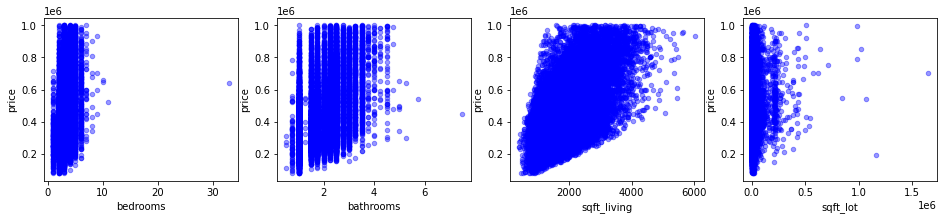

In [12]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

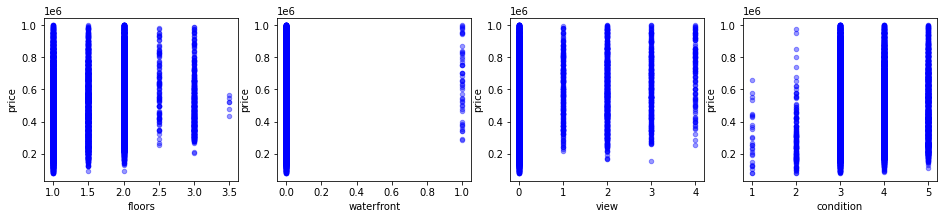

In [13]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['floors', 'waterfront', 'view', 'condition'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b') 
#all of these are categorical

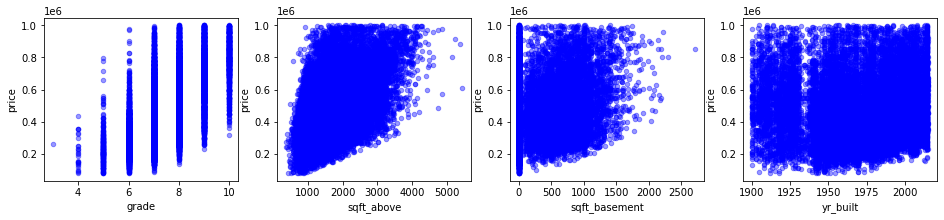

In [14]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'sqft_above', 'sqft_basement', 'yr_built'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')  
#grade is categorical

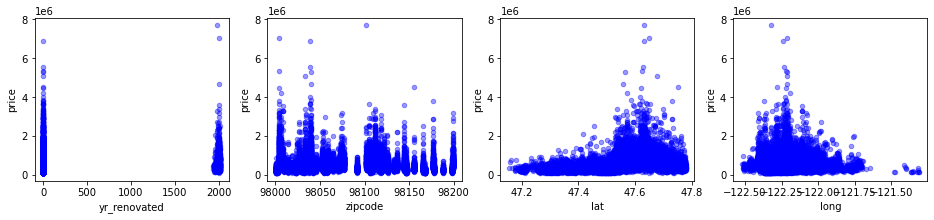

In [15]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_renovated', 'zipcode', 'lat', 'long'], axes):
    mr_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')   
#yr_renovated

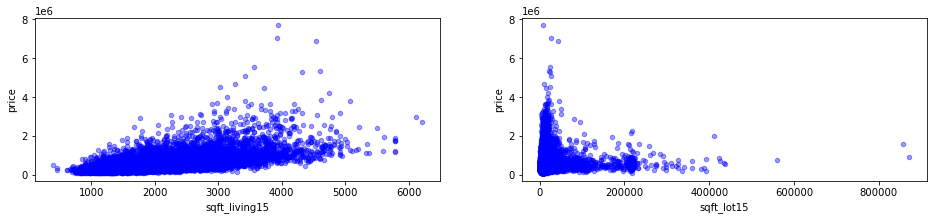

In [16]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['sqft_living15', 'sqft_lot15'], axes):
    mr_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')  

### Shaving the Dataset Based on Problem Statement
From the scatter plots there are several categories that clearly have large outliers. I am going to remove them from this model as they do not represent the normative house. While this will ultimately make my model let acurate on the extremes of the housing market I believe it will allow me to build a more relevant model for the stake holder's purposes. I am also going to be treating the outliers by column individually, in the previously refered to notebooks I took a generalized 3 STD away from the mean approach.

In [17]:
#look at the bedroom values
subset2['bedrooms'].unique()  
#outlier = 33 bedrooms

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [18]:
#locate the 33 bedroom column 
subset2.loc[subset2['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [19]:
#uncomment to drop row 
subset2.drop([15856], inplace=True)

In [20]:
#look at the bathroom values
subset2['bathrooms'].unique() 

array([1.  , 2.25, 3.  , 2.  , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  , 3.5 ,
       0.75, 4.25, 1.25, 3.75, 4.5 , 4.75, 5.  , 0.5 , 5.25, 7.5 , 5.75])

7.5 bathrooms, while possible is very high. This number of bathrooms is also only in one home and the next highest number of bathrooms is 5.75, 2 bathrooms less. It's an outliers I am going to drop.

In [21]:
subset2.loc[subset2['bathrooms'] == 7.5]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8537,450000.0,9,7.5,4050,6504,2.0,0.0,0.0,3,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866


In [22]:
#uncomment to drop row
subset2.drop([8537], inplace=True)

In [23]:
subset2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [24]:
subset2.loc[subset2['sqft_living'] < 5000] 
#all but 17 houses fall below the 5000 sqft marker I am going to remove those from the grouping 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [25]:
subset2.loc[subset2['sqft_living'] > 5000] 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
577,930000.0,4,4.00,6050,84942,2.5,0.0,2.0,3,9,4150,1900.0,2009,0.0,98077,47.7466,-122.029,2700,199504
1620,610000.0,4,3.25,5450,37058,1.5,0.0,0.0,5,9,5450,0.0,1984,0.0,98042,47.3510,-122.087,2800,35716
2381,650000.0,5,3.50,5110,10018,2.0,0.0,0.0,3,10,3850,1260.0,2003,0.0,98034,47.7261,-122.170,1790,10018
3228,965000.0,4,3.25,5010,49222,2.0,0.0,0.0,5,9,3710,1300.0,1978,0.0,98027,47.5489,-122.092,3140,54014
3717,884900.0,7,4.75,5370,10800,1.5,0.0,0.0,3,8,5370,0.0,1967,0.0,98040,47.5380,-122.223,2310,10910
3950,700000.0,4,3.50,5360,25800,1.0,0.0,0.0,3,9,3270,2090.0,1971,0.0,98074,47.6099,-122.054,2650,21781
6622,850000.0,4,2.75,5440,239580,1.0,0.0,0.0,2,9,2720,2720.0,1969,0.0,98001,47.3540,-122.293,1970,40392
7273,800000.0,6,4.25,5480,189050,2.0,0.0,0.0,4,10,5140,340.0,1991,0.0,98031,47.4120,-122.168,2470,10429
7538,915000.0,4,4.50,5250,48352,2.0,0.0,0.0,3,10,5250,0.0,1998,0.0,98059,47.4858,-122.111,2500,48352
8188,955000.0,4,4.25,5660,193593,2.0,0.0,0.0,3,10,4100,1560.0,2001,0.0,98019,47.7064,-121.981,3620,207141


In [26]:
#uncomment to drop 
subset2.drop([577, 1620, 2381, 3228, 3717, 3950, 6622, 7273, 7538, 8188, 8337, 8355, 10968, 12005, 19809, 20280, 20876], inplace=True)

In [27]:
subset2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [28]:
subset2.loc[subset2["sqft_lot"] > 1000000] 
#there are 4 houses (farms really!) that are more than 1,000,000 sqft these are not the type of homes we will be dealing with

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,700000.0,4,1.00,1300,1651359,1.0,0.0,3.0,4,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
7640,542500.0,5,3.25,3010,1074218,1.5,0.0,0.0,5,8,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
7762,855000.0,4,3.50,4030,1024068,2.0,0.0,0.0,3,10,4030,0.0,2006,0.0,98045,47.4619,-121.744,1830,11700
17305,190000.0,2,1.00,710,1164794,1.0,0.0,0.0,2,5,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730


In [29]:
#uncomment to drop values
subset2.drop([1717, 7640, 7762, 17305], inplace=True)

In [30]:
subset2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [31]:
#located sqft_above above a threshold
subset2.loc[subset2["sqft_above"] > 4500]  
#nost of the homes with more than 4500 swft of living are at the upper threshold price range set, visually this threshold 
#makes sense too 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
532,970000.0,4,3.25,4740,76230,2.0,0.0,0.0,3,10,4740,0.0,1987,0.0,98075,47.5931,-122.071,3340,49206
2409,487000.0,6,3.25,4750,248600,2.0,0.0,0.0,4,8,4750,0.0,1947,0.0,98022,47.1879,-121.973,2230,311610
3268,800000.0,4,2.50,4600,67369,2.0,0.0,0.0,3,10,4600,0.0,1990,0.0,98053,47.6417,-121.992,4600,67369
4019,960000.0,4,3.50,4610,11676,2.0,0.0,0.0,3,10,4610,0.0,2000,0.0,98075,47.6011,-121.983,3900,11164
9450,569950.0,5,4.50,4850,40902,2.0,0.0,0.0,3,10,4850,0.0,2001,0.0,98023,47.3181,-122.344,1640,13503
11871,975000.0,5,4.00,4850,36450,2.0,0.0,0.0,3,10,4850,0.0,1977,0.0,98005,47.6426,-122.158,3850,35325
16863,750000.0,3,3.25,4610,81935,2.0,0.0,0.0,4,9,4610,0.0,1984,0.0,98074,47.6217,-122.021,2900,43500


In [32]:
#uncomment to drop values
subset2.drop([532, 2409, 3268, 4019, 9450, 11871, 16863], inplace=True)

In [33]:
subset2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [34]:
#located sqft_basement above a threshold
subset2.loc[subset2["sqft_basement"] > 2200]   
#only 2 values above this threshold

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14845,805000.0,5,2.50,4600,19831,1.0,0.0,3.0,3,9,2300,2300.0,1956,2015.0,98177,47.7608,-122.378,2890,19831
19247,959000.0,6,3.25,4440,17424,1.0,0.0,1.0,4,9,2220,2220.0,1959,0.0,98040,47.5791,-122.230,2660,10768


In [35]:
#uncomment to drop values
subset2.drop([14845, 19247], inplace=True)

In [36]:
subset2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [37]:
#located lat above a threshold
subset2.loc[subset2["lat"] > 47.7775]   
#after a visual inspection of a map these properties fall on the far norther edge of the king county border with saconma 
#county

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
306,550000.0,4,2.75,1800,7750,1.0,0.0,0.0,4,8,1400,400.0,1965,0.0,98177,47.7776,-122.384,1800,8275
15752,407500.0,4,2.50,1900,9075,2.0,0.0,0.0,3,7,1900,0.0,1988,0.0,98133,47.7776,-122.352,1800,8460
17450,389950.0,3,1.75,1580,9049,1.0,0.0,0.0,3,8,1580,0.0,1966,0.0,98177,47.7776,-122.375,2100,8446


In [38]:
#uncomment to drop values
subset2.drop([306, 15752, 17450], inplace=True)

In [39]:
subset2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [40]:
#### locate values on far eastern side of county 
subset2.loc[(subset2["long"] > -121.5) & (subset2["long"] < -120)]   

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2587,134000.0,2,1.50,980,5000,2.0,0.0,0.0,3,7,980,0.0,1922,2003.0,98014,47.7076,-121.359,1040,5000
2925,167000.0,1,1.00,780,10235,1.5,0.0,0.0,3,6,780,0.0,1989,0.0,98014,47.7130,-121.315,930,10165
4199,150000.0,3,0.75,490,38500,1.5,0.0,0.0,4,5,490,0.0,1959,0.0,98014,47.7112,-121.315,800,18297
4844,525000.0,3,2.75,2100,10362,2.0,0.0,0.0,3,9,1510,590.0,1998,0.0,98045,47.4347,-121.417,2240,11842
5861,175000.0,2,1.75,1050,9800,1.5,0.0,0.0,4,6,1050,0.0,1975,0.0,98019,47.7595,-121.473,1230,12726
6083,150000.0,3,1.00,890,6488,1.5,0.0,0.0,3,5,890,0.0,1928,0.0,98014,47.7087,-121.352,1330,16250
10084,200000.0,2,1.75,1320,13052,1.5,0.0,0.0,3,7,1320,0.0,1980,0.0,98014,47.7120,-121.352,1320,13052
10886,241000.0,2,1.75,1070,9750,1.5,0.0,0.0,3,7,1070,0.0,1995,0.0,98014,47.7131,-121.319,970,9750
13059,155000.0,2,1.00,1010,43056,1.5,0.0,0.0,3,5,1010,0.0,1990,0.0,98014,47.7105,-121.316,830,18297
13236,375000.0,3,1.75,2140,13598,1.5,0.0,0.0,4,7,1620,520.0,1970,0.0,98014,47.7139,-121.321,930,10150


In [41]:
#uncomment to drop values
subset2.drop([2587, 2925, 4199, 4844, 5861, 6083, 10084, 10886, 13059, 13236, 13981, 14601, 16828, 16927, 19634, 19964, 21370], inplace=True)   

#### Revisualize Data Dispersal

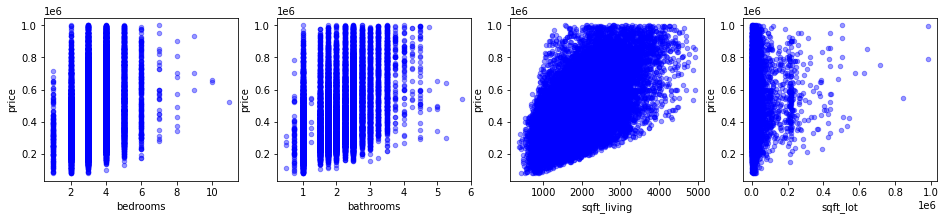

In [42]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

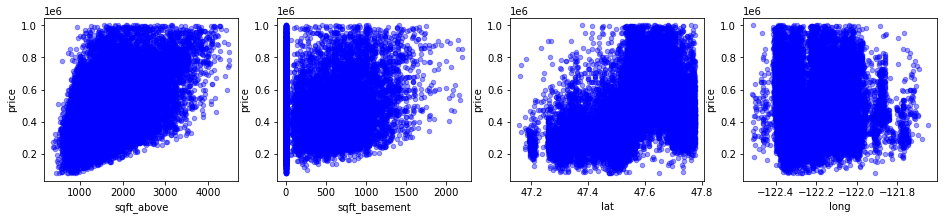

In [43]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_above', 'sqft_basement', 'lat', 'long'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [44]:
subset2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


It looks like there are still som outliers to treat with bedrooms, bathrooms, sqft_lot. I am going to re trim the data in those columns.

#### Resubset Data

In [45]:
#bedrooms above new threshold 
subset2.loc[subset2['bedrooms'] > 4]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,3,7,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850
22,285000.0,5,2.50,2270,6300,2.0,0.0,0.0,3,8,2270,0.0,1995,0.0,98092,47.3266,-122.169,2240,7005
42,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,3,9,3595,0.0,2014,0.0,98053,47.6848,-122.016,3625,5639
51,345000.0,5,2.50,3150,9134,1.0,0.0,0.0,4,8,1640,1510.0,1966,0.0,98056,47.4934,-122.189,1990,9133
54,920000.0,5,2.25,2730,6000,1.5,0.0,0.0,3,8,2130,600.0,1927,0.0,98105,47.6571,-122.281,2730,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21506,462500.0,6,3.00,2390,4000,2.0,0.0,0.0,3,7,2390,0.0,2014,0.0,98118,47.5173,-122.286,1680,5000
21544,540000.0,5,2.50,3370,4850,2.0,0.0,0.0,3,9,3370,0.0,2007,0.0,98056,47.5078,-122.169,2900,5570
21545,750000.0,5,4.00,4500,8130,2.0,0.0,0.0,3,10,4500,0.0,2007,0.0,98059,47.4832,-122.145,2840,8402
21548,579950.0,5,2.75,3080,5752,2.0,0.0,0.0,3,9,3080,0.0,2014,0.0,98059,47.4922,-122.153,3000,4650


In [46]:
#uncomment to remove  
subset2.drop([11973, 14309, 15827, 16999], inplace=True)

In [47]:
subset2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [48]:
#bedrooms above new threshold 
subset2.loc[subset2['bathrooms'] > 3.25]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
75,832500.0,4,4.0,3430,35102,2.0,0.0,0.0,4,10,2390,1040.0,1986,0.0,98075,47.5822,-121.987,3240,35020
115,740500.0,3,3.5,4380,6350,2.0,0.0,0.0,3,8,2780,0.0,1900,0.0,98117,47.6981,-122.368,1830,6350
116,518500.0,3,3.5,1590,1102,3.0,0.0,0.0,3,8,1590,0.0,2010,0.0,98103,47.6824,-122.347,1620,3166
128,822500.0,5,3.5,2320,4960,2.0,0.0,0.0,5,7,1720,600.0,1926,0.0,98103,47.6763,-122.352,1700,4960
132,784000.0,3,3.5,3950,111078,1.5,0.0,0.0,3,9,2460,1490.0,1989,0.0,98052,47.6970,-122.072,2480,88500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483,850000.0,5,3.5,4200,5400,2.0,0.0,0.0,3,9,3140,1060.0,2012,0.0,98052,47.7077,-122.120,3300,5564
21487,735000.0,4,3.5,2340,2810,2.0,0.0,2.0,3,8,1730,610.0,2011,0.0,98027,47.5403,-122.028,2600,2843
21545,750000.0,5,4.0,4500,8130,2.0,0.0,0.0,3,10,4500,0.0,2007,0.0,98059,47.4832,-122.145,2840,8402
21555,608500.0,4,3.5,2850,5577,2.0,0.0,0.0,3,8,1950,900.0,2014,0.0,98056,47.5252,-122.192,2850,5708


In [49]:
print(subset2["sqft_lot"].mean())
print(subset2["sqft_lot"].median())

14067.842985971944
7490.0


Theres a huge difference between the mean and median of the sqft of these houses I am going to look at what threshold would get those two closer together.

In [50]:
sq_ft_threshold = subset2.loc[subset2['sqft_lot'] < 20000] 

In [51]:
sq_ft_threshold['sqft_lot'].mean()

7288.932102871078

In [52]:
sq_ft_threshold['sqft_lot'].median()

7200.0

Looking at the data I would have to loose over 10,000 rows in order to make the mean and median more even. I am going to log transform the remaining columns instead to preserve those. 

#### Revisualize Data 

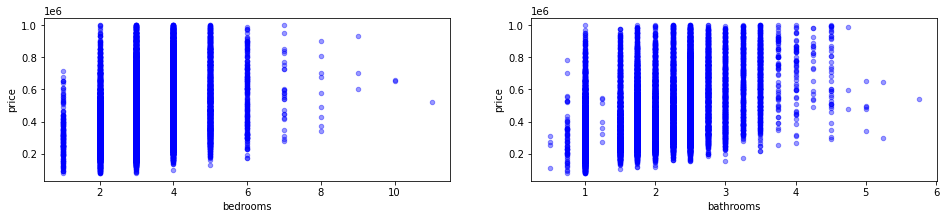

In [53]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

I am still not satisfied with that threshold 

In [54]:
subset2.loc[subset2['bedrooms'] > 8] 
subset2.drop([4092, 4231, 8748, 15147, 18428, 19239], inplace=True)

In [55]:
subset2.loc[subset2['bathrooms'] > 4.5] 
subset2.drop([1434, 1658, 2343, 4594, 5205, 12216, 15737, 16789, 19640, 20968, 21267], inplace=True)

#### Revisualize Data 

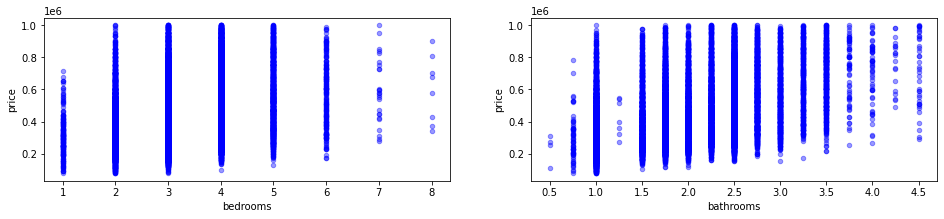

In [56]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

### Categorical Variables

#### Dummify Waterfront 
Create either they a waterfront view or they do not

In [57]:
#create a dummy waterfront
waterfront_dummies = pd.get_dummies(subset2['waterfront'], prefix='wf', drop_first=True)

In [58]:
subset3 = pd.concat([subset2, waterfront_dummies], axis=1)
#if it has a 1 that means there is a waterfront view 

In [59]:
subset3.drop(['waterfront'], axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,wf_1.0
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0


In [60]:
subset4 = subset3.drop(['waterfront'], axis=1)

In [61]:
subset4['wf_1.0'] = subset4['wf_1.0'].astype(int)

In [62]:
subset4['wf'] = subset4['wf_1.0']

In [63]:
subset5 = subset4.drop(['wf_1.0'], axis=1)

#### Dummify "yr_renovated"  
Only 500 houses have been renovated at all, while it still a helpful metric I think that the year it was renvoated doesn't affect the model.

In [64]:
#map a 1 if renovated 0 if not 
subset5['yr_renovated'] = subset5['yr_renovated'].map(lambda x: '1' if x < 1 else '0')

#### Dummify "view"
The view coloumn denotes a view rating, I am going to dummify it if it has a view worth noting it will be a 1 otherwise 0

In [65]:
subset5['view'] = subset5['view'].map(lambda x: '1' if x > 1 else '0')

## Feature Scaling & Normalization

#### Log Transform

In [66]:
subset5.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'wf'],
      dtype='object')

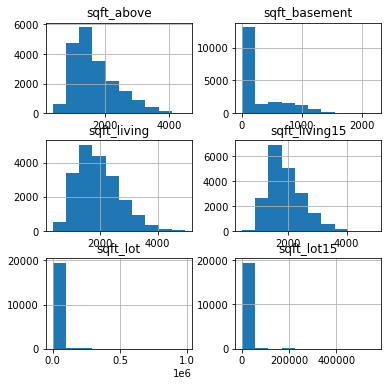

In [67]:
subset5[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].hist(figsize  = [6, 6]); 

Issues with skewness in all of them and variation in magnitude.

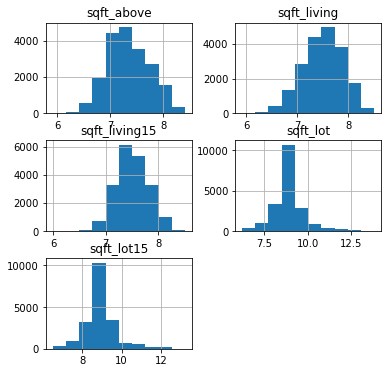

In [68]:
data_log = pd.DataFrame([])
data_log['sqft_living'] = np.log(subset5['sqft_living'])  
data_log['sqft_lot'] = np.log(subset5['sqft_lot']) 
data_log['sqft_above'] = np.log(subset5['sqft_above'])  
data_log['sqft_living15'] = np.log(subset5['sqft_living15']) 
data_log['sqft_lot15'] = np.log(subset5['sqft_lot15'])
data_log.hist(figsize  = [6, 6]);

The log of sqft_basement returned a -int number so I will not log transform that the other columns look better after being transformed.

In [69]:
data_log

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
0,7.073270,8.639411,7.073270,7.200425,8.639411
1,7.851661,8.887653,7.682482,7.432484,8.941022
2,6.646391,9.210340,6.646391,7.908387,8.994917
3,7.580700,8.517193,6.956545,7.215240,8.517193
4,7.426549,8.997147,7.426549,7.495542,8.923058
...,...,...,...,...,...
21592,7.333023,7.030857,7.333023,7.333023,7.319202
21593,7.745003,8.667852,7.745003,7.512071,8.881836
21594,6.927558,7.207860,6.927558,6.927558,7.604396
21595,7.377759,7.778211,7.377759,7.251345,7.160069


#### Normalize Data

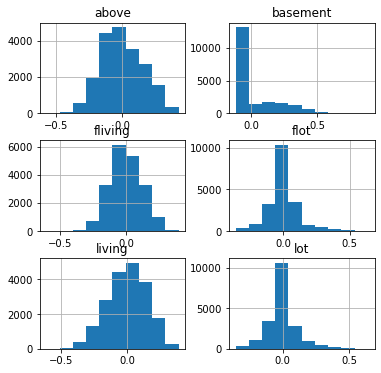

In [70]:
#See how the columns look when normalized
sqft_living_norm = data_log['sqft_living'] 
sqft_lot_norm = data_log['sqft_lot'] 
sqft_lot_above_norm = data_log['sqft_above'] 
sqft_living15_norm = data_log['sqft_living15'] 
sqft_lot15_norm = data_log['sqft_lot15'] 
sqft_basement_norm = subset5["sqft_basement"]

scaled_sqft_living = (sqft_living_norm - np.mean(sqft_living_norm)) / (max(sqft_living_norm) - min(sqft_living_norm)) 
scaled_sqft_lot = (sqft_lot_norm - np.mean(sqft_lot_norm)) / (max(sqft_lot_norm) - min(sqft_lot_norm)) 
scaled_sqft_above = (sqft_lot_above_norm - np.mean(sqft_lot_above_norm)) / (max(sqft_lot_above_norm) - min(sqft_lot_above_norm)) 
scaled_living15 = (sqft_living15_norm - np.mean(sqft_living15_norm)) / (max(sqft_living15_norm) - min(sqft_living15_norm)) 
scaled_lot15 = (sqft_lot15_norm - np.mean(sqft_lot15_norm)) / (max(sqft_lot15_norm) - min(sqft_lot15_norm)) 
scaled_sqft_basement = (sqft_basement_norm - np.mean(sqft_basement_norm)) / (max(sqft_basement_norm) - min(sqft_basement_norm))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['living'] = scaled_sqft_living 
data_cont_scaled['lot'] = scaled_sqft_lot 
data_cont_scaled['above'] = scaled_sqft_above  
data_cont_scaled['fliving'] = scaled_living15 
data_cont_scaled['flot'] = scaled_lot15 
data_cont_scaled['basement'] = scaled_sqft_basement

data_cont_scaled.hist(figsize = [6, 6]);

They all look much better even sqft basement is not as heavy 0. 

#### Min Max Scaling

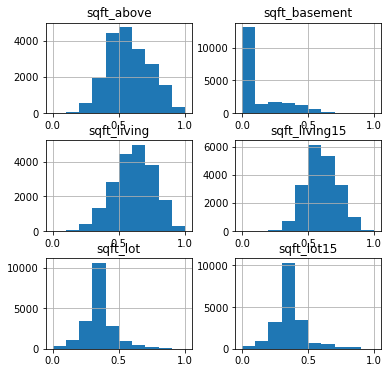

In [71]:
#See how the columns look when min/max scaled
sqft_living_norm = data_log['sqft_living'] 
sqft_lot_norm = data_log['sqft_lot'] 
sqft_lot_above_norm = data_log['sqft_above'] 
sqft_living15_norm = data_log['sqft_living15'] 
sqft_lot15_norm = data_log['sqft_lot15'] 
sqft_basement_norm = subset5["sqft_basement"] 

min_max_living = (sqft_living_norm - min(sqft_living_norm)) / (max(sqft_living_norm) - min(sqft_living_norm))  
min_max_lot = (sqft_lot_norm - min(sqft_lot_norm)) / (max(sqft_lot_norm) - min(sqft_lot_norm)) 
min_max_above = (sqft_lot_above_norm - min(sqft_lot_above_norm)) / (max(sqft_lot_above_norm) - min(sqft_lot_above_norm)) 
min_max_living15 = (sqft_living15_norm - min(sqft_living15_norm)) / (max(sqft_living15_norm) - min(sqft_living15_norm)) 
min_max_lot15 = (sqft_lot15_norm - min(sqft_lot15_norm)) / (max(sqft_lot15_norm) - min(sqft_lot15_norm)) 
min_max_basement = (sqft_basement_norm - min(sqft_basement_norm)) / (max(sqft_basement_norm) - min(sqft_basement_norm))

data_cont_scaled_min_max = pd.DataFrame([])
data_cont_scaled_min_max['sqft_living'] = min_max_living
data_cont_scaled_min_max['sqft_lot'] = min_max_lot
data_cont_scaled_min_max['sqft_above'] = min_max_above 
data_cont_scaled_min_max['sqft_living15'] = min_max_living15 
data_cont_scaled_min_max['sqft_lot15'] = min_max_lot15 
data_cont_scaled_min_max['sqft_basement'] = min_max_basement

data_cont_scaled_min_max.hist(figsize = [6, 6]);

#### Standardization of the Data

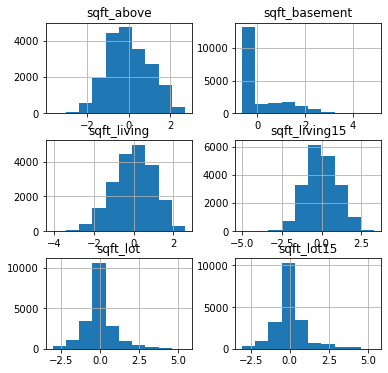

In [72]:
#See how the columns look when standardized scaled
sqft_living_norm = data_log['sqft_living'] 
sqft_lot_norm = data_log['sqft_lot'] 
sqft_lot_above_norm = data_log['sqft_above'] 
sqft_living15_norm = data_log['sqft_living15'] 
sqft_lot15_norm = data_log['sqft_lot15'] 
sqft_basement_norm = subset5["sqft_basement"] 

std_living = (sqft_living_norm - np.mean(sqft_living_norm)) / np.sqrt(np.var(sqft_living_norm)) 
std_lot = (sqft_lot_norm - np.mean(sqft_lot_norm)) / np.sqrt(np.var(sqft_lot_norm)) 
std_above = (sqft_lot_above_norm - np.mean(sqft_lot_above_norm)) / np.sqrt(np.var(sqft_lot_above_norm)) 
std_living15 = (sqft_living15_norm - np.mean(sqft_living15_norm)) / np.sqrt(np.var(sqft_living15_norm)) 
std_lot15 = (sqft_lot15_norm  - np.mean(sqft_lot15_norm)) / np.sqrt(np.var(sqft_lot15_norm )) 
std_basement = (sqft_basement_norm - np.mean(sqft_basement_norm )) / np.sqrt(np.var(sqft_basement_norm))
  

data_cont_scaled_std = pd.DataFrame([])
data_cont_scaled_std['sqft_living'] = std_living
data_cont_scaled_std['sqft_lot'] = std_lot
data_cont_scaled_std['sqft_above'] = std_above 
data_cont_scaled_std['sqft_living15'] = std_living15 
data_cont_scaled_std['sqft_lot15'] = std_lot15 
data_cont_scaled_std['sqft_basement'] = std_basement

data_cont_scaled_std.hist(figsize = [6, 6]);

In [73]:
subset6 = pd.concat([subset5, data_cont_scaled], axis=1, join='outer')

In [74]:
subset6["view"] = subset6["view"].astype(int)
subset6["yr_renovated"] = subset6["yr_renovated"].astype(int)

## Run Linear Regression

In [75]:
#look at z scores (relationship to the std & mean) 
z = np.abs(stats.zscore(subset6)) 
threshold = 3 #3 std away from them mean 
z_score = subset6[(z<3).all(axis=1)] 
print(np.where(z > 3)) 
z_score

(array([    1,     9,     9, ..., 19914, 19930, 19931], dtype=int64), array([12, 10, 24, ...,  6,  6,  9], dtype=int64))


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,long,sqft_living15,sqft_lot15,wf,living,lot,above,fliving,flot,basement
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,...,-122.257,1340,5650,0,-0.163972,-0.041118,-0.109531,-0.120341,-0.042419,-0.116337
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,...,-122.233,2720,8062,0,-0.328687,0.034557,-0.280397,0.160799,0.010184,-0.116337
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,...,-122.393,1360,5000,0,0.031825,-0.057317,-0.156252,-0.114458,-0.060503,0.297300
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,...,-122.045,1800,7503,0,-0.027656,0.006299,0.031875,-0.003146,-0.000448,-0.116337
6,257500.0,3,2.25,1715,6819,2.0,0,3,7,1715,...,-122.327,2238,6819,0,-0.019699,-0.016192,0.040129,0.083343,-0.014593,-0.116337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,...,-122.346,1530,1509,0,-0.063743,-0.254326,-0.005560,-0.067684,-0.237765,-0.116337
21593,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,...,-122.362,1830,7200,0,0.095223,-0.037348,0.159342,0.003418,-0.006548,-0.116337
21594,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,...,-122.299,1020,2007,0,-0.220196,-0.230865,-0.167855,-0.228700,-0.195566,-0.116337
21595,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,...,-122.069,1410,1287,0,-0.046482,-0.155267,0.012346,-0.100120,-0.261312,-0.116337


### Set Up TrainTest Split

In [76]:
X = z_score.drop('price', axis=1)
y = z_score['price']

In [77]:
# Split the data into training and test sets (assign 20% to test set) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [78]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15337 1705 15337 1705


In [79]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,...,long,sqft_living15,sqft_lot15,wf,living,lot,above,fliving,flot,basement
5203,3,2.50,1460,8800,1.0,0,4,7,1460,0.0,...,-122.232,2200,8800,0,-0.081814,0.017613,-0.024305,0.076542,0.023145,-0.116337
28,3,1.75,1520,6380,1.0,0,3,7,790,730.0,...,-122.304,1520,6235,0,-0.066274,-0.025012,-0.270133,-0.070289,-0.027841,0.215481
6698,2,1.00,1080,9067,1.0,0,3,6,1080,0.0,...,-122.331,1080,6647,0,-0.198141,0.021575,-0.144976,-0.206001,-0.018373,-0.116337
5298,2,1.00,960,8236,1.0,0,2,6,960,0.0,...,-122.166,1260,8236,0,-0.243589,0.008834,-0.192121,-0.144786,0.013344,-0.116337
11808,3,1.75,1730,3400,1.0,0,5,7,970,760.0,...,-122.364,1640,5000,0,-0.016339,-0.108435,-0.187973,-0.040114,-0.060503,0.229118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20546,3,2.25,1630,2520,2.0,0,3,7,1630,0.0,...,-121.998,1630,3131,0,-0.039314,-0.148135,0.019782,-0.042542,-0.129764,-0.116337
1910,3,2.00,1340,10200,1.5,0,3,7,1340,0.0,...,-122.351,1420,10200,0,-0.114908,0.037182,-0.058635,-0.097313,0.044990,-0.116337
4500,3,2.00,2064,46173,2.0,0,5,7,2064,0.0,...,-122.455,1640,21780,0,0.051774,0.237327,0.114271,-0.040114,0.157238,-0.116337
13112,3,2.50,1720,3951,2.0,0,3,7,1720,0.0,...,-122.187,1720,3605,0,-0.018576,-0.088528,0.041294,-0.021200,-0.108905,-0.116337


### Trial 1 (Baseline)

In [80]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'wf', 'living', 'lot', 'above', 'fliving', 'flot', 'basement'],
      dtype='object')

In [81]:
X1 = X_train
y1 = y_train

In [82]:
train = pd.concat([X_train, y_train], axis=1, join='outer')

In [83]:
#baseline model 

regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1) 
    
baseline= np.mean(cross_val_score(regression, X1, y1, scoring='r2', cv=crossvalidation))
print("Baseline:", baseline)

Baseline: 0.6782446803913101


#### Investigate Mulitcollinearity

In [84]:
correlation_df = X_train.corr() 
correlation_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,...,long,sqft_living15,sqft_lot15,wf,living,lot,above,fliving,flot,basement
bedrooms,1.000000,0.468660,0.610445,0.118674,0.152044,NaN,0.020461,0.319341,0.488592,0.233146,...,0.201190,0.409939,0.123605,NaN,0.635143,0.231698,0.519040,0.418582,0.216261,0.233146
bathrooms,0.468660,1.000000,0.686663,0.035803,0.527086,NaN,-0.155764,0.596880,0.607966,0.159850,...,0.298674,0.523356,0.042737,NaN,0.707117,-0.038052,0.634060,0.533380,-0.033988,0.159850
sqft_living,0.610445,0.686663,1.000000,0.224485,0.343822,NaN,-0.081284,0.670583,0.848623,0.299443,...,0.342324,0.740278,0.229614,NaN,0.976787,0.282119,0.838129,0.727674,0.265868,0.299443
sqft_lot,0.118674,0.035803,0.224485,1.000000,-0.127927,NaN,0.049204,0.124989,0.205777,0.040438,...,0.274735,0.266029,0.844553,NaN,0.209990,0.797224,0.202161,0.258717,0.711628,0.040438
floors,0.152044,0.527086,0.343822,-0.127927,1.000000,NaN,-0.296286,0.471225,0.530222,-0.320898,...,0.154867,0.273762,-0.127230,NaN,0.342045,-0.375037,0.533472,0.261086,-0.358944,-0.320898
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.020461,-0.155764,-0.081284,0.049204,-0.296286,NaN,1.000000,-0.197171,-0.190840,0.191862,...,-0.094884,-0.136737,0.060025,NaN,-0.066737,0.132032,-0.175889,-0.128228,0.135502,0.191862
grade,0.319341,0.596880,0.670583,0.124989,0.471225,NaN,-0.197171,1.000000,0.679153,0.005460,...,0.268551,0.642911,0.142565,NaN,0.659696,0.055748,0.674478,0.626202,0.070845,0.005460
sqft_above,0.488592,0.607966,0.848623,0.205777,0.530222,NaN,-0.190840,0.679153,1.000000,-0.242592,...,0.439373,0.723721,0.215430,NaN,0.812196,0.245119,0.976968,0.695398,0.232209,-0.242592
sqft_basement,0.233146,0.159850,0.299443,0.040438,-0.320898,NaN,0.191862,0.005460,-0.242592,1.000000,...,-0.162905,0.052941,0.032634,NaN,0.322351,0.074912,-0.220382,0.080301,0.068721,1.000000


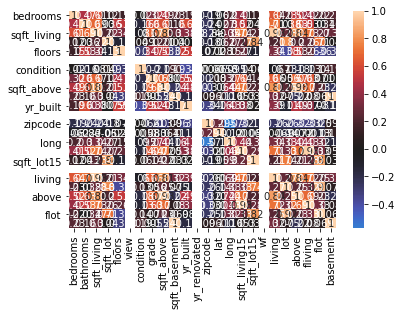

In [85]:
sns.heatmap(correlation_df, center=0, annot=True) 

In [86]:
#correlation above 0.75 is highly correlated
abs(X_train.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,...,long,sqft_living15,sqft_lot15,wf,living,lot,above,fliving,flot,basement
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [87]:
#Check for correlation numerically
df=X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [88]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(basement, sqft_basement)",1.000000
"(fliving, sqft_living15)",0.984517
"(above, sqft_above)",0.976968
"(living, sqft_living)",0.976787
"(flot, lot)",0.916524
"(sqft_living, sqft_above)",0.848623
"(sqft_lot15, sqft_lot)",0.844553
"(sqft_living, above)",0.838129
"(above, living)",0.836867


Begin removing features that are overly correlated as indicated on the df.cc check above.

### Trial 2 
Remove 'sqft_living15', 'sqft_above', 'sqft_living', 'lot'

In [89]:
train1 = train.drop(["sqft_living15", "sqft_above", "sqft_living", "lot"], axis=1)

In [90]:
#redefine problem
outcome = "price"
t2 = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15',
       'wf', 'living', 'above', 'fliving', 'flot', 'basement']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1937.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        06:29:35   Log-Likelihood:            -1.9907e+05
No. Observations:               15337   AIC:                         3.982e+05
Df Residuals:                   15320   BIC:                         3.983e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.241e+05   9.28e+05     -0.565

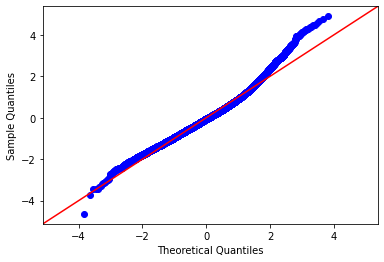

In [91]:
lin_reg(outcome="price", x_cols=t2, df=train1)

In [92]:
correlation_df2 = train1.corr() 
correlation_df2

,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,yr_renovated,...,lat,long,sqft_lot15,wf,living,above,fliving,flot,basement,price
bedrooms,1.000000,0.468660,0.118674,0.152044,NaN,0.020461,0.319341,0.233146,0.192450,NaN,...,-0.061917,0.201190,0.123605,NaN,0.635143,0.519040,0.418582,0.216261,0.233146,0.267976
bathrooms,0.468660,1.000000,0.035803,0.527086,NaN,-0.155764,0.596880,0.159850,0.604089,NaN,...,-0.027072,0.298674,0.042737,NaN,0.707117,0.634060,0.533380,-0.033988,0.159850,0.390610
sqft_lot,0.118674,0.035803,1.000000,-0.127927,NaN,0.049204,0.124989,0.040438,0.007923,NaN,...,-0.062079,0.274735,0.844553,NaN,0.209990,0.202161,0.258717,0.711628,0.040438,0.082820
floors,0.152044,0.527086,-0.127927,1.000000,NaN,-0.296286,0.471225,-0.320898,0.551098,NaN,...,0.027546,0.154867,-0.127230,NaN,0.342045,0.533472,0.261086,-0.358944,-0.320898,0.264898
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.020461,-0.155764,0.049204,-0.296286,NaN,1.000000,-0.197171,0.191862,-0.386005,NaN,...,-0.005759,-0.094884,0.060025,NaN,-0.066737,-0.175889,-0.128228,0.135502,0.191862,0.045019
grade,0.319341,0.596880,0.124989,0.471225,NaN,-0.197171,1.000000,0.005460,0.522941,NaN,...,0.083165,0.268551,0.142565,NaN,0.659696,0.674478,0.626202,0.070845,0.005460,0.584443
sqft_basement,0.233146,0.159850,0.040438,-0.320898,NaN,0.191862,0.005460,1.000000,-0.169833,NaN,...,0.114221,-0.162905,0.032634,NaN,0.322351,-0.220382,0.080301,0.068721,1.000000,0.173282
yr_built,0.192450,0.604089,0.007923,0.551098,NaN,-0.386005,0.522941,-0.169833,1.000000,NaN,...,-0.163783,0.425062,0.026728,NaN,0.390551,0.492998,0.374939,-0.081143,-0.169833,0.056099
yr_renovated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


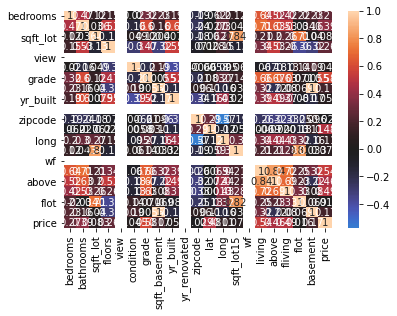

In [93]:
sns.heatmap(correlation_df2, center=0, annot=True) 

In [94]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(basement, sqft_basement)",1.000000
"(fliving, sqft_living15)",0.984517
"(above, sqft_above)",0.976968
"(living, sqft_living)",0.976787
"(flot, lot)",0.916524
"(sqft_living, sqft_above)",0.848623
"(sqft_lot15, sqft_lot)",0.844553
"(sqft_living, above)",0.838129
"(above, living)",0.836867


### Trial 3 

In [95]:
train2 = train.drop(["living"], axis=1)

In [96]:
train2.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'wf', 'lot', 'above', 'fliving', 'flot', 'basement', 'price'],
      dtype='object')

In [97]:
#redefine problem
outcome = "price"
t3 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'wf', 'lot', 'above', 'fliving', 'flot', 'basement']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1705.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        06:29:39   Log-Likelihood:            -1.9884e+05
No. Observations:               15337   AIC:                         3.977e+05
Df Residuals:                   15317   BIC:                         3.979e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.417e+06   9.23e+05      1.535

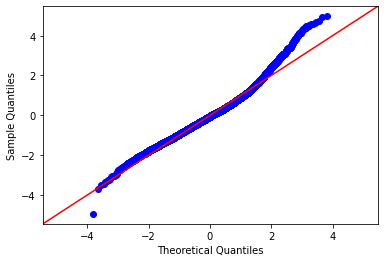

In [98]:
lin_reg(outcome=outcome, x_cols=t3, df=train2)

That improved our model!

In [99]:
correlation_df3 = train2.corr() 
correlation_df3

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,...,long,sqft_living15,sqft_lot15,wf,lot,above,fliving,flot,basement,price
bedrooms,1.000000,0.468660,0.610445,0.118674,0.152044,NaN,0.020461,0.319341,0.488592,0.233146,...,0.201190,0.409939,0.123605,NaN,0.231698,0.519040,0.418582,0.216261,0.233146,0.267976
bathrooms,0.468660,1.000000,0.686663,0.035803,0.527086,NaN,-0.155764,0.596880,0.607966,0.159850,...,0.298674,0.523356,0.042737,NaN,-0.038052,0.634060,0.533380,-0.033988,0.159850,0.390610
sqft_living,0.610445,0.686663,1.000000,0.224485,0.343822,NaN,-0.081284,0.670583,0.848623,0.299443,...,0.342324,0.740278,0.229614,NaN,0.282119,0.838129,0.727674,0.265868,0.299443,0.561474
sqft_lot,0.118674,0.035803,0.224485,1.000000,-0.127927,NaN,0.049204,0.124989,0.205777,0.040438,...,0.274735,0.266029,0.844553,NaN,0.797224,0.202161,0.258717,0.711628,0.040438,0.082820
floors,0.152044,0.527086,0.343822,-0.127927,1.000000,NaN,-0.296286,0.471225,0.530222,-0.320898,...,0.154867,0.273762,-0.127230,NaN,-0.375037,0.533472,0.261086,-0.358944,-0.320898,0.264898
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.020461,-0.155764,-0.081284,0.049204,-0.296286,NaN,1.000000,-0.197171,-0.190840,0.191862,...,-0.094884,-0.136737,0.060025,NaN,0.132032,-0.175889,-0.128228,0.135502,0.191862,0.045019
grade,0.319341,0.596880,0.670583,0.124989,0.471225,NaN,-0.197171,1.000000,0.679153,0.005460,...,0.268551,0.642911,0.142565,NaN,0.055748,0.674478,0.626202,0.070845,0.005460,0.584443
sqft_above,0.488592,0.607966,0.848623,0.205777,0.530222,NaN,-0.190840,0.679153,1.000000,-0.242592,...,0.439373,0.723721,0.215430,NaN,0.245119,0.976968,0.695398,0.232209,-0.242592,0.473503
sqft_basement,0.233146,0.159850,0.299443,0.040438,-0.320898,NaN,0.191862,0.005460,-0.242592,1.000000,...,-0.162905,0.052941,0.032634,NaN,0.074912,-0.220382,0.080301,0.068721,1.000000,0.173282


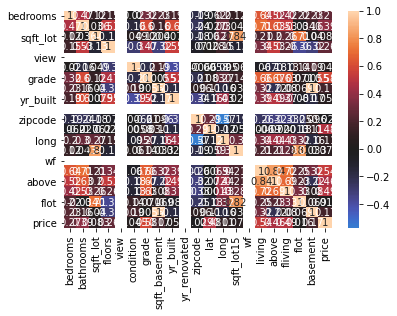

In [100]:
sns.heatmap(correlation_df2, center=0, annot=True) 

In [101]:
#Check for correlation numerically
df1=train2.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df1['pairs'] = list(zip(df1.level_0, df1.level_1))

# set index to pairs
df1.set_index(['pairs'], inplace = True)

#d rop level columns
df1.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df1.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df1.drop_duplicates(inplace=True)

In [102]:
df1[(df1.cc>.75) & (df1.cc <1)]

,cc
pairs,
"(basement, sqft_basement)",1.000000
"(sqft_living15, fliving)",0.984517
"(sqft_above, above)",0.976968
"(lot, flot)",0.916524
"(sqft_above, sqft_living)",0.848623
"(sqft_lot, sqft_lot15)",0.844553
"(above, sqft_living)",0.838129
"(sqft_lot15, flot)",0.820837
"(sqft_lot, lot)",0.797224


### Trail 4  

In [103]:
train3 = train2.drop(['sqft_living15', 'sqft_above', 'lot'], axis=1)

In [104]:
train3.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'wf', 'above', 'fliving',
       'flot', 'basement', 'price'],
      dtype='object')

In [105]:
#redefine problem
outcome = "price"
t4 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'wf', 'above', 'fliving',
       'flot', 'basement']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2005.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        06:29:44   Log-Likelihood:            -1.9890e+05
No. Observations:               15337   AIC:                         3.978e+05
Df Residuals:                   15320   BIC:                         3.980e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.822e+05   9.19e+05      0.851

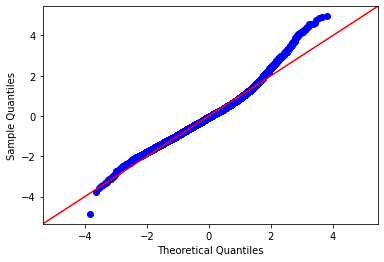

In [106]:
lin_reg(outcome="price", x_cols=t4, df=train3)

In [107]:
#Check for correlation numerically
df2=train3.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to pairs
df2.set_index(['pairs'], inplace = True)

#d rop level columns
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df2.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df2.drop_duplicates(inplace=True) 

df2[(df2.cc>.75) & (df2.cc <1)]

,cc
pairs,
"(basement, sqft_basement)",1.000000
"(sqft_lot, sqft_lot15)",0.844553
"(above, sqft_living)",0.838129
"(sqft_lot15, flot)",0.820837


### Trial 5 

In [108]:
train4 = train3.drop(["above", "sqft_lot15"], axis=1)

In [109]:
train4.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'wf', 'fliving', 'flot', 'basement', 'price'],
      dtype='object')

In [110]:
outcome5 = "price"
t5 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'wf', 'fliving', 'flot', 'basement']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     2278.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        06:29:47   Log-Likelihood:            -1.9893e+05
No. Observations:               15337   AIC:                         3.979e+05
Df Residuals:                   15322   BIC:                         3.980e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.915e+04   9.15e+05      0.043

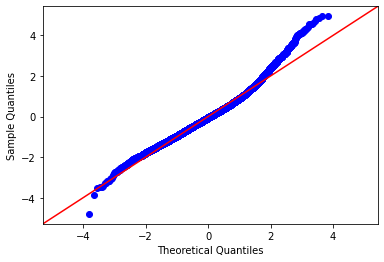

In [111]:
lin_reg(outcome="price", x_cols=t5, df=train4)

In [112]:
#Check for correlation numerically
df3=train4.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df3['pairs'] = list(zip(df3.level_0, df3.level_1))

# set index to pairs
df3.set_index(['pairs'], inplace = True)

#d rop level columns
df3.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df3.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df3.drop_duplicates(inplace=True) 

df3[(df3.cc>.75) & (df3.cc <1)]

,cc
pairs,
"(basement, sqft_basement)",1.0


All previous trails were dropping columns based on high correlation scores. 

### Trial 6 

In [113]:
train5 = train4.copy()

In [114]:
train5.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'wf', 'fliving', 'flot', 'basement', 'price'],
      dtype='object')

In [115]:
outcome= "price"
t6 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'wf', 'fliving', 'flot', 'basement']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     2278.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        06:29:50   Log-Likelihood:            -1.9893e+05
No. Observations:               15337   AIC:                         3.979e+05
Df Residuals:                   15322   BIC:                         3.980e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.915e+04   9.15e+05      0.043

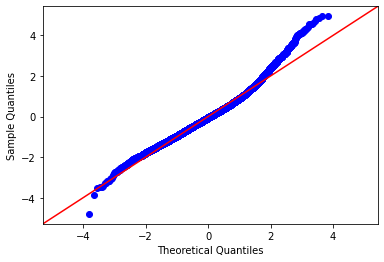

In [116]:
lin_reg(outcome="price", x_cols=t6, df=train5)

### Trail 7 
Look for correlated columns to find a model with signifigance.

In [117]:
train6 = train5.drop(["zipcode"], axis=1)

In [118]:
train6.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'wf', 'fliving', 'flot', 'basement', 'price'],
      dtype='object')

In [119]:
columns_correlations = []
columns_non_numeric = []

for column in train6.drop(columns=[outcome]).columns:
    try:
        corr = np.abs(train6[column].corr(train6[outcome]))
        t = (column, corr)
        columns_correlations.append(t)
    except:
        columns_non_numeric.append(column) 
columns_correlations

[('bedrooms', 0.2679755606198312),
 ('bathrooms', 0.39061000117993244),
 ('sqft_living', 0.5614743466569074),
 ('sqft_lot', 0.08281960535714249),
 ('floors', 0.2648979129964048),
 ('view', nan),
 ('condition', 0.04501924353308024),
 ('grade', 0.5844433081924993),
 ('sqft_basement', 0.17328248744385796),
 ('yr_built', 0.056099482876392236),
 ('yr_renovated', nan),
 ('lat', 0.4846464319198015),
 ('long', 0.10949740586265327),
 ('wf', nan),
 ('fliving', 0.49224994043099857),
 ('flot', 0.016302286582041657),
 ('basement', 0.1732824874438586)]

In [120]:
correlated_features_above_2 = [t[0] for t in columns_correlations if t[1] >= 0.10]
correlated_features_above_2

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'grade',
 'sqft_basement',
 'lat',
 'long',
 'fliving',
 'basement']

In [121]:
#take the sum of bathrooms/bedrooms 
train6["bed_bath"] = train6['bedrooms'] + train6['bathrooms'] 

I iterated over the combination of statistically signifigance correlations dozens of times. Most combinations hovered in the high 0.3 for the R2 scored. Many of the features in this data set were heavily correlated. I landed on the model below in part consideration of my stakehold looking at correlations that can be modified(renovated) in order to predict future home price. While it is not a perfect model I feel confident that any predictions I do make will not be do to multicollinearity and meets the assumptions of OLS. 

In [123]:
outcome="price"
t7 = ['fliving', 'grade', 'flot']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     3082.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:57:24   Log-Likelihood:            -2.0394e+05
No. Observations:               15337   AIC:                         4.079e+05
Df Residuals:                   15333   BIC:                         4.079e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.808e+05   1.22e+04    -14.813      0.0

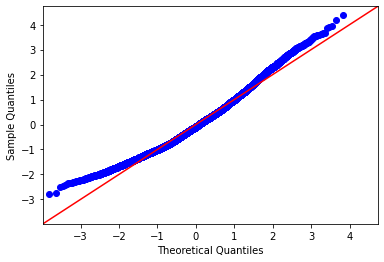

In [124]:
lin_reg(outcome="price", x_cols=t7, df=train6)

### Fit Model

In [125]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [126]:
test = pd.concat([X_test, y_test], axis=1, join='outer')

### Mean Squared Error

In [127]:
y_hat_test

array([566134.27334328, 878480.75977197, 417043.6456213 , ...,
       418723.44012461, 405320.41494758, 529573.14288233])

In [128]:
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse 
#sq root of this is 105837.68

10508310288.76585

### KFold

In [129]:
mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse) 
cv_5_results

array([1.11874737e+10, 1.08847951e+10, 1.04832699e+10, 1.03082975e+10,
       1.09177635e+10])

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error')) 

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-10756319952.460804
-10744035454.2838
-10710171852.0553


All of these are relatively similar which is good! 

## Visualizing Error

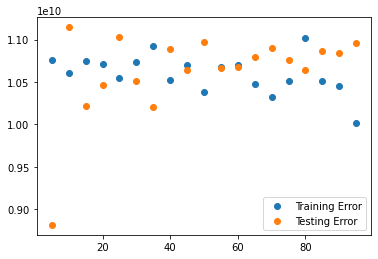

In [131]:
#error for time
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

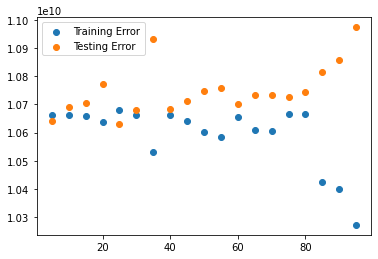

In [132]:
#size
random.seed(900)

train_err = []
test_err = []
t_sizes = range(5,100,5)
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

### Conclusion

From my calculations it seems that the strongest non colinear relationship I can find between predicting house price and features the larger and nicer your house is the more expensive it is. Even though I accounted for everything outside 2 std from the mean in my most recent trial (and it did prove better results there were still heavy Omnibus and JB scores probably due to unnormal data distribution. The qqplot indicates that my model is least accurate at the small end physically of the house. I think this make sense when you consider that houses that are very small but expensive are being influenced by outside factors such as being in a dense zipcode, having a great view ect. 